<a href="https://colab.research.google.com/github/vijaynadimpalli/PDE-Deep_Learning-vs-FFT/blob/main/Fourier_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we approximate a function using fourier transform..

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fourier_step_func(t, n_circles):
  """
  Fourier transform for step function.
  """

  res = np.zeros(len(t))
  n = 1
  pi = np.pi
  L = 2 * pi

  while n_circles != 0:
    res += (4 / (n * pi)) * np.sin(n * pi * t / L)
    n += 2
    n_circles -= 1
  
  return res

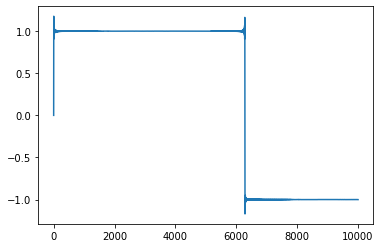

In [ ]:
plt.plot(fourier_step_func(np.linspace(0, 10, 10000), 1000))

In [ ]:
def dome_func(t):
  if t >= 0.5:
    res = 1 - t
  else:
    res = t

  return t + 1j * res

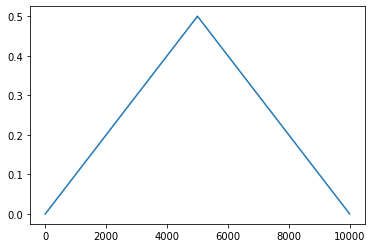

In [ ]:
time_steps = np.linspace(0, 1, 10000)

res = list(map(dome_func, time_steps))

plt.plot(np.imag(res))

In [ ]:
from scipy.integrate import quad
import scipy as sp

def fourier_approx(time_steps, func, n_total):
  n_array = np.arange(-n_total/2, n_total/2 + 1, 1)

  c_array_real = np.zeros(len(n_array))
  c_array_imag = np.zeros(len(n_array))

  res = np.zeros(len(time_steps))
  res = res + 1j*res

  for ind, n in enumerate(n_array):
    integrand = lambda t : np.exp(-2*np.pi*1j*n*t) * func(t)

    def real_val(x):
      return np.real(integrand(x))

    def img_val(x):
      return np.imag(integrand(x))

    c_array_real[ind] = quad(real_val, 0, 1)[0]
    c_array_imag[ind] = quad(img_val, 0, 1)[0]

    res += (c_array_real[ind] + 1j*c_array_imag[ind]) * np.exp(2*np.pi*1j*n*time_steps)
  
  return res

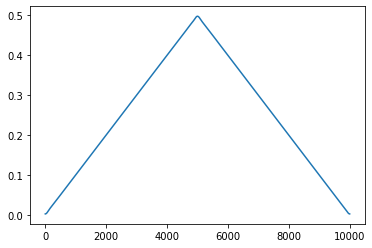

In [ ]:
plt.plot(np.imag(fourier_approx(time_steps, dome_func, 100)))